## Generate SDE-based simulation data

Working on SDEvelo


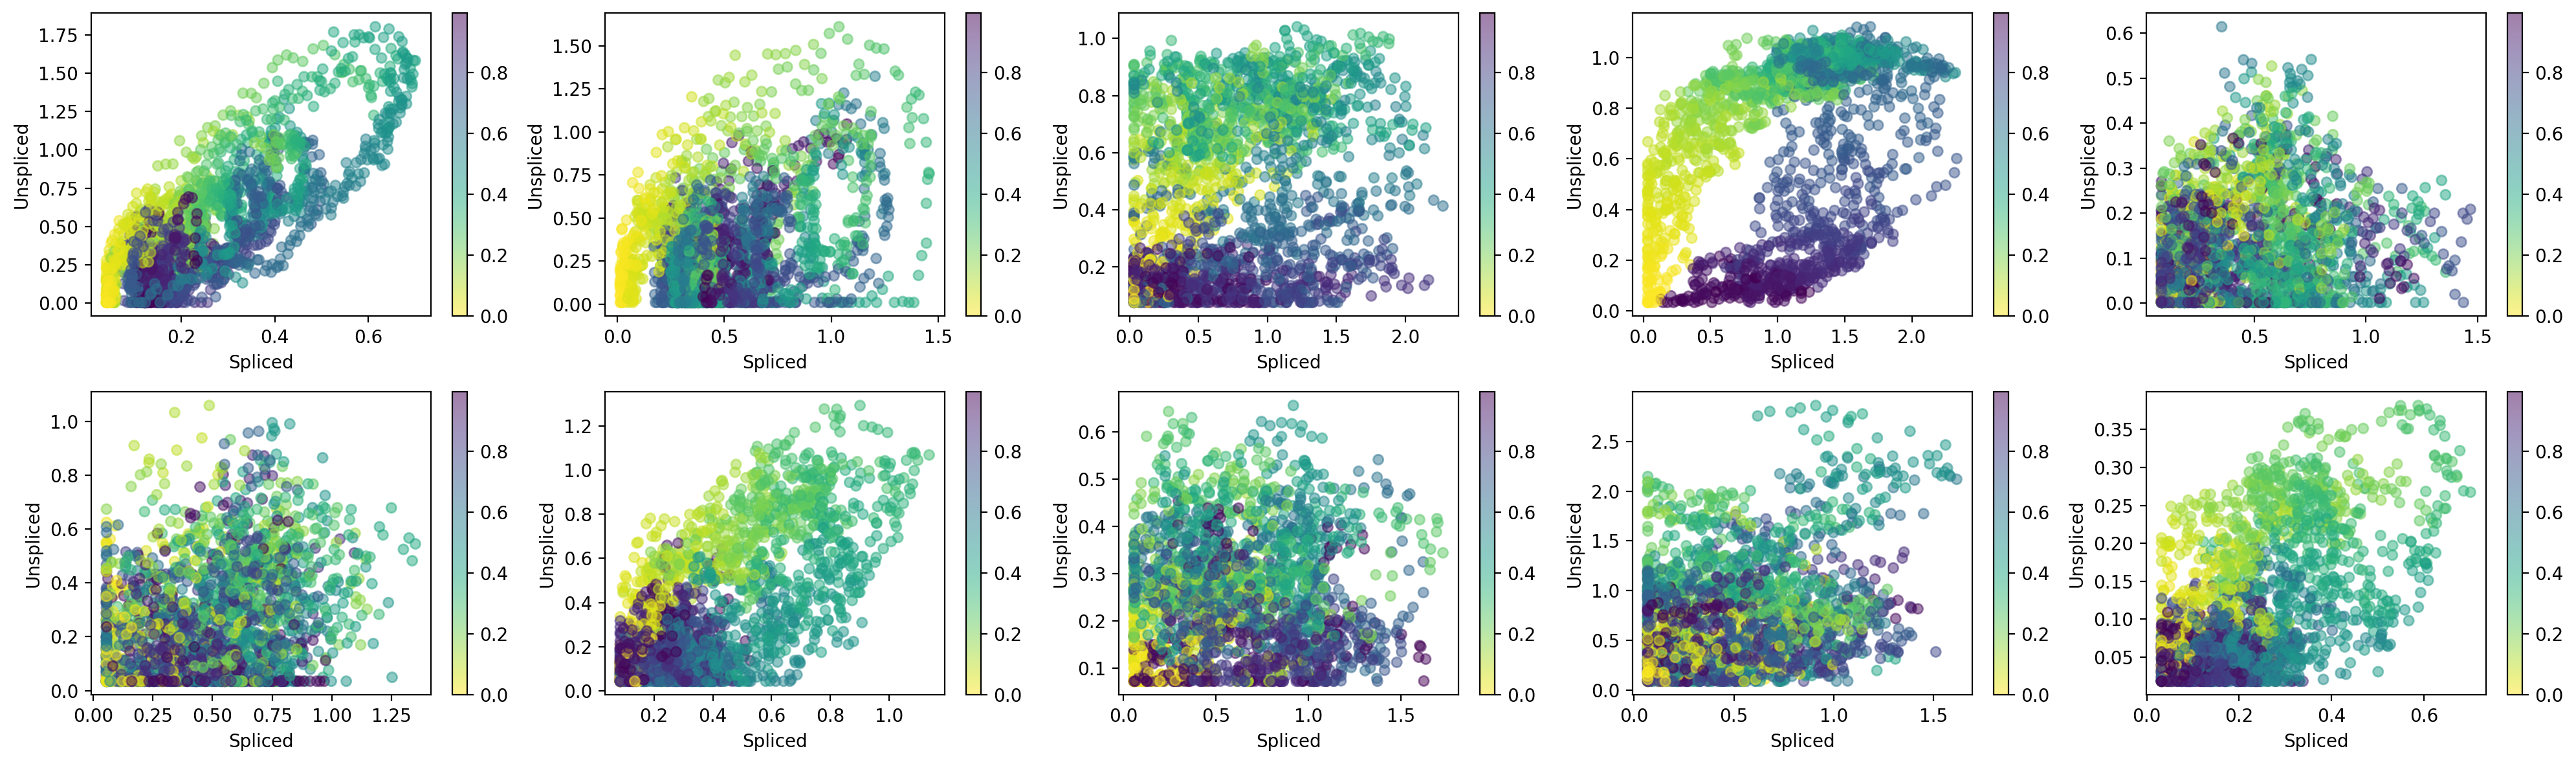

In [1]:
import sdevelo as sv

simulation = sv.SimData(n_vars=100)
adata = simulation.generate()

# Simulation unspliced and spliced scatter plot
simulation.plot_scatter(n1=2, n2=5)

## Train SDEvelo model

In [2]:
args = sv.Config()
model = sv.SDENN(args, adata)
adata = model.train(args.nEpochs)

Skip filtering by dispersion since number of variables are less than `n_top_genes`.
Logarithmized X.
computing neighbors


2024-04-09 19:46:45.450086: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-09 19:46:46.017323: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


    finished (0:00:07) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
Epoch: 0, Loss: 0.748, alpha: 0.91, beta: 2.96, gamma: 0.45, s1: 0.012, s2: 0.010,  t_m: 0.372,  u_shift: -0.003,  s_shift: -0.001


## Visualization

computing velocity graph (using 10/128 cores)


  0%|          | 0/2000 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'sde_velocity_graph', sparse matrix with cosine correlations (adata.uns)
--> added 'sde_velocity_length' (adata.obs)
--> added 'sde_velocity_confidence' (adata.obs)
--> added 'sde_velocity_confidence_transition' (adata.obs)
computing velocity embedding
    finished (0:00:00) --> added
    'sde_velocity_pca', embedded velocity vectors (adata.obsm)


/home/xuliao/anaconda3/envs/py38/lib/python3.8/site-packages/scvelo/plotting/utils.py:869: MatplotlibDeprecationWarning: The draw_all function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use fig.draw_without_rendering() instead.
  cb.draw_all()


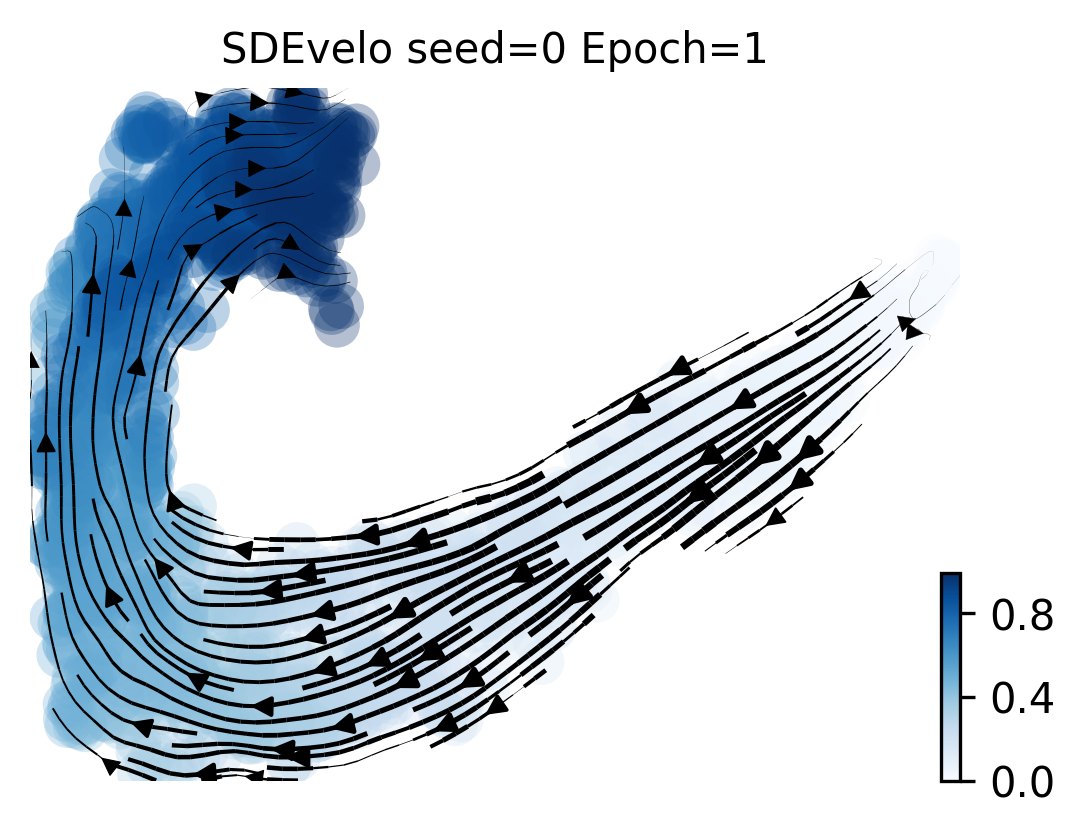

In [3]:
sv.plot_streamline(adata, args)

/home/xuliao/velo/SDEvelo/SDEvelo_git/sdevelo/_pl.py:36: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  ax.figure.colorbar(sm)


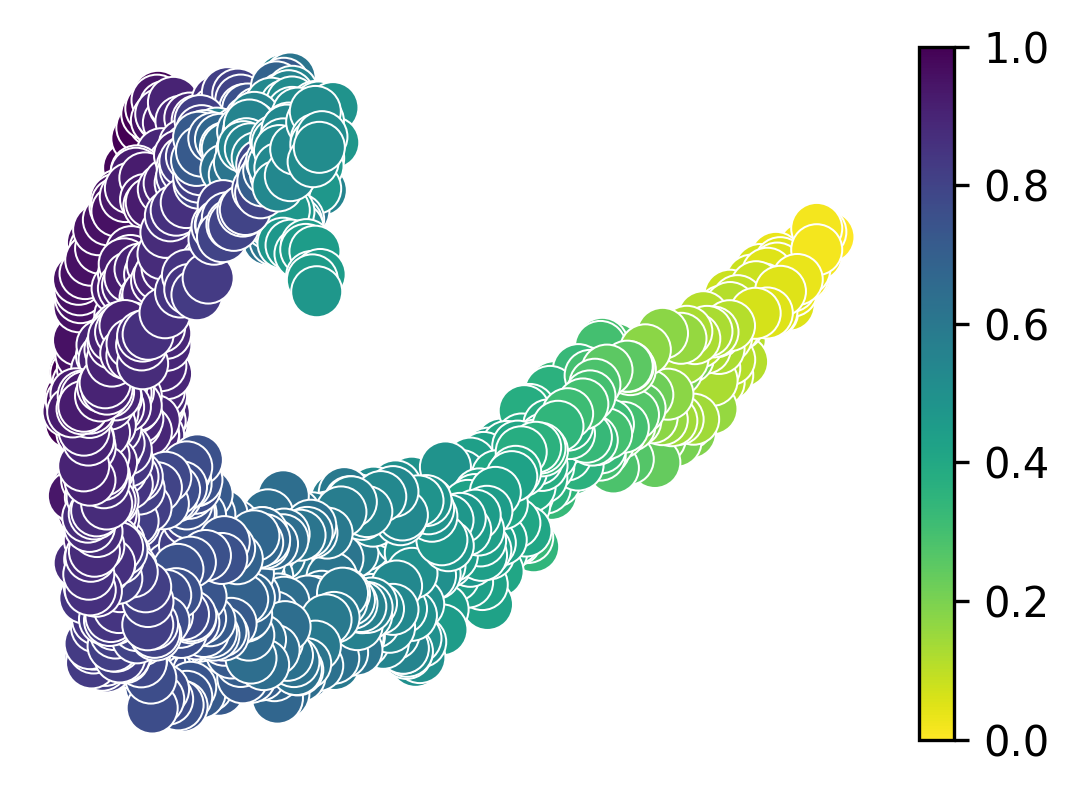

In [4]:
sv.plot_latent_time(adata, args)

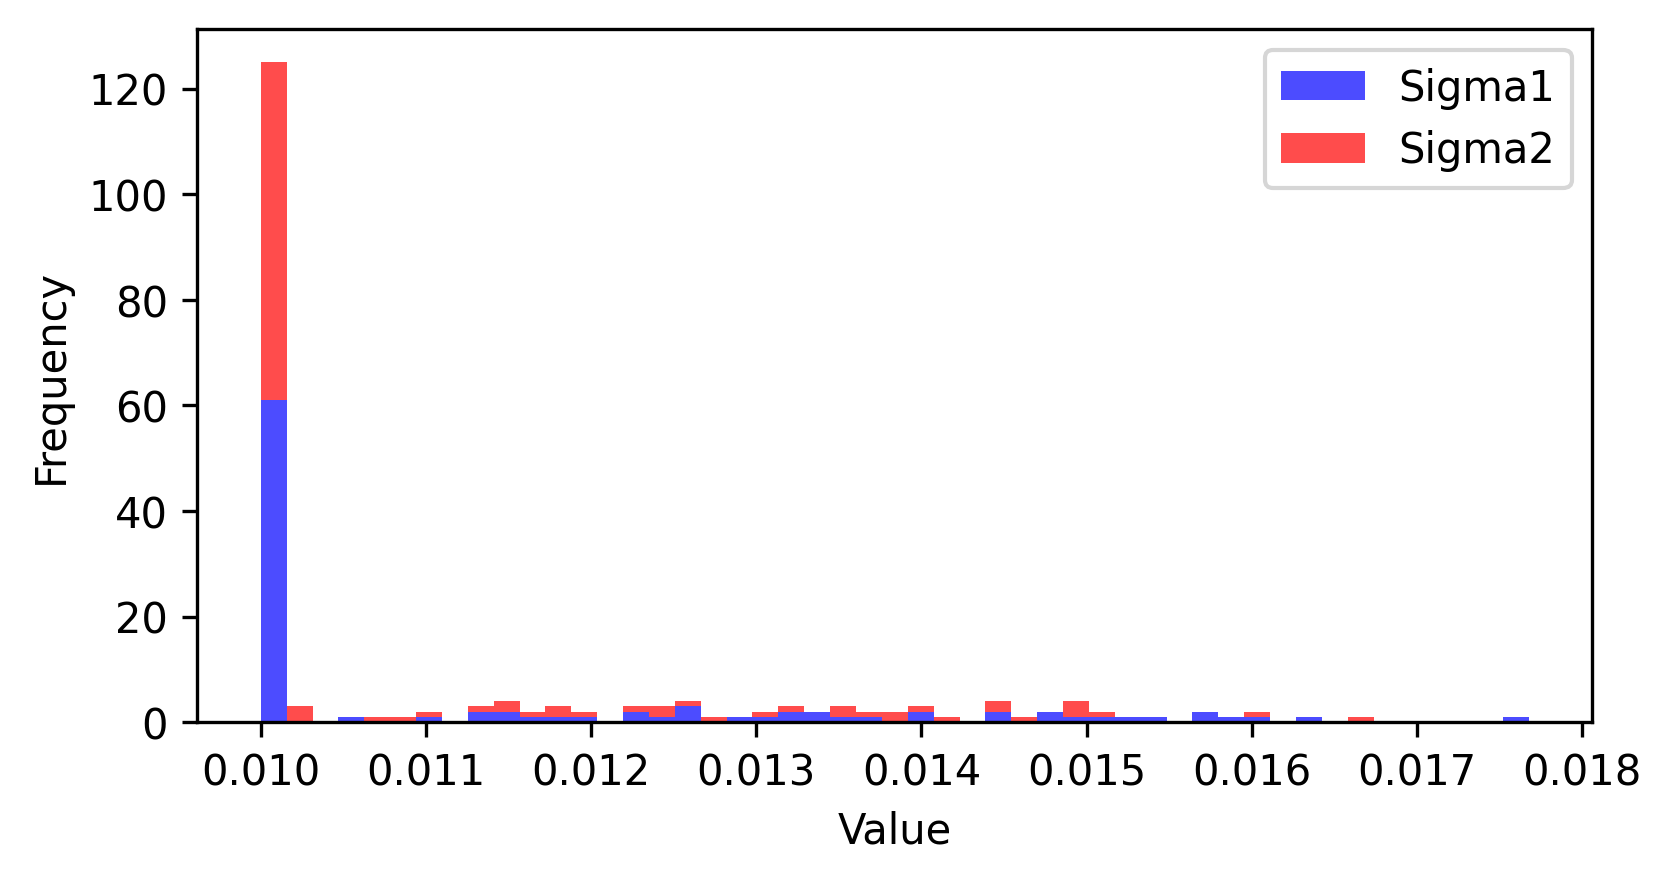

In [5]:
sv.plot_noise_histogram(adata)